# Cuaderno 3: Algoritmo de la cadena aumentante

$\newcommand{\R}{\mathbb{R}}$
Trataremos en este cuaderno el problema de encontrar un flujo-($s$, $t$) máximo en una red capacitada.
 
Implementaremos el algoritmo de Ford-Fulkerson de la cadena aumentante, con la correción de Dinits-Edmonds-Karp (se usan cadenas aumentantes con el menor número posible de arcos). 

Consideremos el grafo dirigido $D=(V, A)$, con capacidades $u \in \R^{A}$ sobre los arcos, nodo fuente $s \in V$ y nodo sumidero $t \in V$ dados por medio de las siguientes variables:

In [1]:
V = list(range(1, 7))
A = [(1,2), (1,3), (2,3), (2,4), (3,5), (2, 5), (3,4), (5,4), (4,6), (5, 6)]
# capacidades de los arcos
u = [4, 5, 3, 2, 3, 2, 2, 4, 5, 5]
# nodo fuente
s = 1
# nodo sumidero
t = 6

print('V= {}'.format(V))
print('A= {}'.format(A))
print('u= {}'.format(u))


V= [1, 2, 3, 4, 5, 6]
A= [(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (2, 5), (3, 4), (5, 4), (4, 6), (5, 6)]
u= [4, 5, 3, 2, 3, 2, 2, 4, 5, 5]


En primer lugar, creamos diccionarios de con arcos entrantes / salientes a cada nodo, así como con las capacidades de los arcos:

In [2]:
# crear diccionarios de arcos salientes / entrantes
salientes = {i : [(k,j) for (k,j) in A if k==i] for i in V}
entrantes = {i : [(k,j) for (k,j) in A if j==i] for i in V}

# transformar las capacidades en diccionario indexado por los arcos
uu = {A[i] : u[i] for i in range(len(A))}

print('sal= {}'.format(salientes))
print('ent= {}'.format(entrantes))
print('uu= {}'.format(uu))


sal= {1: [(1, 2), (1, 3)], 2: [(2, 3), (2, 4), (2, 5)], 3: [(3, 5), (3, 4)], 4: [(4, 6)], 5: [(5, 4), (5, 6)], 6: []}
ent= {1: [], 2: [(1, 2)], 3: [(1, 3), (2, 3)], 4: [(2, 4), (3, 4), (5, 4)], 5: [(3, 5), (2, 5)], 6: [(4, 6), (5, 6)]}
uu= {(1, 2): 4, (1, 3): 5, (2, 3): 3, (2, 4): 2, (3, 5): 3, (2, 5): 2, (3, 4): 2, (5, 4): 4, (4, 6): 5, (5, 6): 5}


Existen algunos módulos de Python que permiten la visualización de grafos. Por ejemplo, pueden usarse los módulos `networkx` y `matplotlib`. Para instalarlos, basta con ejecutar la siguiente celda una sola vez (será necesario luego reiniciar el Kernel de Jupyter).

In [ ]:
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib

Una vez instalados los módulos, pueden ser importados con las siguientes instrucciones:

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

El siguiente fragmento de código permite visualizar el grafo definido al inicio de este cuaderno:

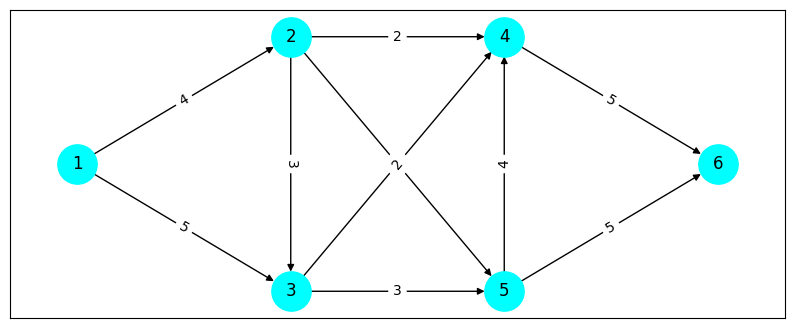

In [4]:
D = nx.DiGraph()
D.add_nodes_from(V)
node_labels= {i : str(i) for i in V}
D.add_edges_from(A)
edge_labels = {(i,j) : str(uu[i,j]) for (i,j) in A}
plt.figure(figsize=(10,4))
pos = {1 : (2,2), 2 : (4,3), 3 : (4,1), 4 : (6,3), 5 : (6,1), 6 : (8,2)}
nx.draw_networkx(D, pos, labels= node_labels, node_color='cyan', node_size=800)
nx.draw_networkx_edge_labels(D, pos, edge_labels)
plt.show()

Almacenaremos el flujo $x \in \R^A$ como un diccionario indexado por los arcos. Inicialmente, el flujo es igual a cero sobre cada arco.

In [5]:
x = {A[i] : 0 for i in range(len(A))}

print (x)


{(1, 2): 0, (1, 3): 0, (2, 3): 0, (2, 4): 0, (3, 5): 0, (2, 5): 0, (3, 4): 0, (5, 4): 0, (4, 6): 0, (5, 6): 0}


Consideremos el problema de encontrar una cadena aumentante de $s$ hasta $t$. Para hacerlo, usaremos un algoritmo de marcaje tipo BFS que empieza en `s` y va colocando sobre cada nodo marcado una etiqueta de la forma `((i,j),eps)`, donde `(i, j)` es el arco de la por el cual se llega al nodo y `eps` la capacidad de una cadena desde `s` hasta el nodo. Para la exploración se usan únicamente arcos hacia adelante que tengan capacidad residual, o arcos en reversa que tengan flujo positivo.

In [6]:
# inicializamos las marcas con None para cada nodo
m = {i : None for i in V}
# valor suficientemente alto (mayor que todas las capacidades)
inf = 1000
# marcamos s
m[s]= (None, inf)
# colocamos s en la cola de nodos por explorar
Q = [s]
print(m)
# mientras Q no esté vacía...
while Q!=[]:
    print("Q= {}".format(Q))
    # tomar un nodo i del inicio de la cola
    i = Q.pop(0)
    print("Procesando nodo {}...".format(i))
    # consultar su etiqueta
    (a, eps1) = m[i]
    # exploramos los arcos salientes de i
    for (i,j) in salientes[i]:
        # si el nodo j ya está marcado, lo ignoramos
        if m[j]!=None:
            continue
        # si el arco tiene capacidad residual...
        if x[i,j] < uu[i,j]:
            # marcamos el nodo j con ((i,j),eps), con eps capacidad residual
            m[j] = ((i,j), min(eps1, uu[i,j] - x[i,j]))
            if j==t:
                break
            # agregamos j a la cola Q
            Q.append(j)
    # exploramos los arcos entrantes a i
    for (j,i) in entrantes[i]:
        # si el nodo j ya está marcado, lo ignoramos
        if m[j]!=None:
            continue;
        # si el arco tiene flujo positivo...
        if x[j,i] > 0:
            # marcamos el nodo j con ((i,j),eps), con eps capacidad residual
            m[j] = ((j,i), min(eps1, x[j,i]))
            # si j==t, terminamos el marcaje
            if j==t:
                break
            # agregamos j a la cola Q
            Q.append(j)
    print(m)
    if m[t]!= None:
        break
        
# mostrar las marcas        
print(m)
# marca de t
print('m[t]= {}'.format(m[t]))

{1: (None, 1000), 2: None, 3: None, 4: None, 5: None, 6: None}
Q= [1]
Procesando nodo 1...
{1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 5), 4: None, 5: None, 6: None}
Q= [2, 3]
Procesando nodo 2...
{1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 5), 4: ((2, 4), 2), 5: ((2, 5), 2), 6: None}
Q= [3, 4, 5]
Procesando nodo 3...
{1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 5), 4: ((2, 4), 2), 5: ((2, 5), 2), 6: None}
Q= [4, 5]
Procesando nodo 4...
{1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 5), 4: ((2, 4), 2), 5: ((2, 5), 2), 6: ((4, 6), 2)}
{1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 5), 4: ((2, 4), 2), 5: ((2, 5), 2), 6: ((4, 6), 2)}
m[t]= ((4, 6), 2)


Notar que, si `t` es marcado durante la exploración BFS, su marca nos permite reconstruir la cadena aumentante "desde el final hacia atrás". Por otra parte, si `t` no es marcado, significa que no existen cadenas aumentantes desde `s`hasta `t`. En el primer caso, el diccionario de marcas `m` puede usarse para aumentar el flujo:

In [7]:
# aumento de flujo
# recorremos la cadena desde t hasta s
i = t
# recuperamos primero la capacidad de la cadena:
# la capacidad eps de la cadena está en la marca de t
(a, eps) = m[t]
# es equivalente a:
# eps = m[t][1]

# aumentamos ahora el flujo sobre la cadeana
while i!=s:
    # el valor de la capacidad en los demás nodos se decarta
    ((j,k),eps1) = m[i]
    # si (j,k) es un arco hacia adelante de la cadena...
    if k==i:
        # aumentar el flujo en eps
        x[j,k]+= eps
        # actualizar i
        i = j
    # caso contrario...
    else:
        # disminuir el flujo en eps
        x[j,k]-= eps
        # actualizar i
        i = k

# mostrar el nuevo flujo
print (x)


{(1, 2): 2, (1, 3): 0, (2, 3): 0, (2, 4): 2, (3, 5): 0, (2, 5): 0, (3, 4): 0, (5, 4): 0, (4, 6): 2, (5, 6): 0}


Empaquetemos ahora el algoritmo de búsqueda BFS dentro de una función llamada `buscar_cadena`, omitiendo los mensajes de salida:

In [8]:
def buscar_cadena(V, salientes, entrantes, uu, x, s, t):
    # inicializamos las marcas con None para cada nodo
    m = {i : None for i in V}
    # valor suficientemente alto (mayor que todas las capacidades)
    inf = 1000
    # marcamos s
    m[s]= (None, inf)
    # colocamos s en la cola de nodos por explorar
    Q = [s]
    # mientras Q no esté vacía...
    while Q!=[]:
        # tomar un nodo i de la cola
        i = Q.pop()
        # consultar su etiqueta
        a, eps1 = m[i]
        # exploramos los arcos salientes de i
        for (i,j) in salientes[i]:
            # si el nodo j ya está marcado, lo ignoramos
            if m[j]!=None:
                continue;
            # si el arco tiene capacidad residual...
            if x[i,j] < uu[i,j]:
                # marcamos el nodo j con ((i,j),eps), con eps capacidad residual
                m[j] = ((i,j), min(eps1, uu[i,j] - x[i,j]))
                if j==t:
                    break
                # agregamos j a la cola Q
                Q.append(j)
        # exploramos los arcos entrantes a i
        for (j,i) in entrantes[i]:
            # si el nodo j ya está marcado, lo ignoramos
            if m[j]!=None:
                continue;
            # si el arco tiene flujo positivo...
            if x[j,i] > 0:
                # marcamos el nodo j con ((i,j),eps), con eps capacidad residual
                m[j] = ((j,i), min(eps1, x[j,i]))
                # si j==t, terminamos el marcaje
                if j==t:
                    break
                # agregamos j a la cola Q
                Q.append(j)
    return m
    
m =  buscar_cadena(V, salientes, entrantes, uu, x, s, t)
print(m)

{1: (None, 1000), 2: ((1, 2), 2), 3: ((1, 3), 5), 4: ((3, 4), 2), 5: ((3, 5), 3), 6: ((4, 6), 2)}


Empaquetamos la rutina de aumento de flujo dentro de una función `aumentar_flujo`:

In [9]:
def aumentar_flujo(m, s, t, x):
    # aumento de flujo
    # recorremos la cadena desde t hasta s
    i = t
    # la capacidad eps de la cadena está en la marca de t
    (a, eps) = m[t]
    while i!=s:
        ((j,k),eps1) = m[i]
        # si (j,k) es un arco hacia adelante de la cadena...
        if k==i:
            # aumentar el flujo en eps
            x[j,k]+= eps
            # actualizar i
            i = j
        # caso contrario...
        else:
            # disminuir el flujo en eps
            x[j,k]-= eps
            # actualizar i
            i = k

# x = {A[i] : 0 for i in range(len(A))}
aumentar_flujo(m, s, t, x)

print(x)

{(1, 2): 2, (1, 3): 2, (2, 3): 0, (2, 4): 2, (3, 5): 0, (2, 5): 0, (3, 4): 2, (5, 4): 0, (4, 6): 4, (5, 6): 0}


Utilizamos las dos funciones anteriores, podemos definir el algoritmo principal de Ford-Fulkerson:

In [10]:
# definir flujo inicial
x = {A[i] : 0 for i in range(len(A))}

# lazo principal
while True:
    m = buscar_cadena(V, salientes, entrantes, uu, x, s, t)
    print('m= {}'.format(m))
    # si no fue posible marcar t, terminar (no hay más cadenas)
    if m[t]==None:
        break
    # caso contrario, aumentar el flujo
    aumentar_flujo(m, s, t, x)
    print('x= {}'.format(x))


m= {1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 5), 4: ((3, 4), 2), 5: ((3, 5), 3), 6: ((4, 6), 2)}
x= {(1, 2): 0, (1, 3): 2, (2, 3): 0, (2, 4): 0, (3, 5): 0, (2, 5): 0, (3, 4): 2, (5, 4): 0, (4, 6): 2, (5, 6): 0}
m= {1: (None, 1000), 2: ((1, 2), 4), 3: ((1, 3), 3), 4: ((5, 4), 3), 5: ((3, 5), 3), 6: ((5, 6), 3)}
x= {(1, 2): 0, (1, 3): 5, (2, 3): 0, (2, 4): 0, (3, 5): 3, (2, 5): 0, (3, 4): 2, (5, 4): 0, (4, 6): 2, (5, 6): 3}
m= {1: (None, 1000), 2: ((1, 2), 4), 3: ((2, 3), 3), 4: ((2, 4), 2), 5: ((2, 5), 2), 6: ((5, 6), 2)}
x= {(1, 2): 2, (1, 3): 5, (2, 3): 0, (2, 4): 0, (3, 5): 3, (2, 5): 2, (3, 4): 2, (5, 4): 0, (4, 6): 2, (5, 6): 5}
m= {1: (None, 1000), 2: ((1, 2), 2), 3: ((2, 3), 2), 4: ((2, 4), 2), 5: None, 6: ((4, 6), 2)}
x= {(1, 2): 4, (1, 3): 5, (2, 3): 0, (2, 4): 2, (3, 5): 3, (2, 5): 2, (3, 4): 2, (5, 4): 0, (4, 6): 4, (5, 6): 5}
m= {1: (None, 1000), 2: None, 3: None, 4: None, 5: None, 6: None}


Finalmente, empaquetamos todo el algoritmo en una función `ford_fulkerson` para el cálculo del flujo máximo en una red capacitada. Eliminamos los mensajes intermedios.

In [11]:
def ford_fulkerson(V, A, u, s, t):
    # crear diccionarios de arcos salientes / entrantes
    salientes = {i : [(k,j) for (k,j) in A if k==i] for i in V}
    entrantes = {i : [(k,j) for (k,j) in A if j==i] for i in V}
    # transformar las capacidades en diccionario indexado por los arcos
    uu = {A[i] : u[i] for i in range(len(A))}
    
    # crear un flujo inicial igual a cero
    x = {A[i] : 0 for i in range(len(A))}
    
    # lazo principal
    while True:
        m = buscar_cadena(V, salientes, entrantes, uu, x, s, t)
        # si no fue posible marcar t, terminar (no hay más cadenas)
        if m[t]==None:
            break
        # caso contrario, aumentar el flujo
        aumentar_flujo(m, s, t, x)
    return x

V = range(1, 7)
A = [(1,2), (1,3), (2,3), (2,4), (3,5), (2, 5), (3,4), (5,4), (4,6), (5, 6)]
# capacidades de los arcos
u = [4, 5, 3, 2, 3, 2, 2, 4, 5, 5]
# nodo fuente
s = 1
# nodo sumidero
t = 6
x = ford_fulkerson(V, A, u, s, t)
print('x= {}'.format(x))
    
    

x= {(1, 2): 4, (1, 3): 5, (2, 3): 0, (2, 4): 2, (3, 5): 3, (2, 5): 2, (3, 4): 2, (5, 4): 0, (4, 6): 4, (5, 6): 5}


Podemos emplear los módulos `networkx` y `matplotlib` para visualizar la solución:

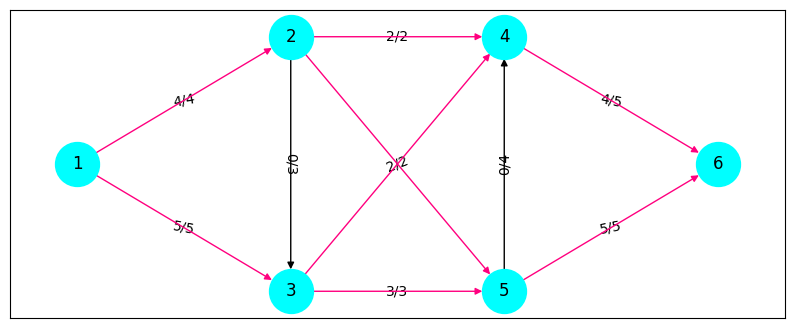

In [12]:
D = nx.DiGraph()
D.add_nodes_from(V)
node_labels= {i : str(i) for i in V}
D.add_edges_from(A)
edge_labels = {(i,j) : str(int(x[i,j])) + '/' + str(uu[i,j]) for (i,j) in A}
edge_colors = ['#ff007f' if x[i,j]>=0.1 else '#000000' for (i,j) in list(D.edges())]
plt.figure(figsize=(10,4))
pos = {1 : (2,2), 2 : (4,3), 3 : (4,1), 4 : (6,3), 5 : (6,1), 6 : (8,2)}
nx.draw_networkx_edge_labels(D, pos, edge_labels)
nx.draw_networkx(D, pos, labels= node_labels, node_color='cyan', node_size=1000, edge_color= edge_colors)


Probemos ahora el algoritmo sobre grafos aleatorios  con `n` vértices y probabilidad `p` de que dos vértices estén conectados con un arco. Medimos su tiempo de ejecución usando la función `time()` del módulo `time`.

In [13]:
import random as r
import time
# Datos de entrada
# número de nodos del grafo
n = 300
# probabilidad de arco
p = 0.7

# Construir grafo conexo aleatorio
# conjunto de nodos
V = range(1, n+1)
# nodos flujo y sumidero
s,t = 1,n
# colocar inicialmente el camino (1,2,3,...,n) para garantizar la existencia de un flujo (s,t)
A=[(i,i+1) for i in range(1,n)]
# colocar los demás arcos de acuerdo a la probabilidad p
for i in V:
    for j in V:
        if i==j or j==i+1:
            continue            
        if r.random() < p:
            A.append((i,j))
# número de aristas
m= len(A)
# construir una lista de capacidades aleatorias en {0..10}
u = [r.randint(1,10) for (i,j) in A]
# print('V= {}'.format(V))
# print('A= {}'.format(A))
print('n= {}'.format(n))
print('m= {}'.format(m))
# print('u= {}'.format(u))

# Correr el algoritmo y registrar el tiempo
t1 = time.time()
x = ford_fulkerson(V, A, u, s, t)
t2 = time.time()
# mostrar el flujo 
print('Algoritmo de Ford-Fulkerson:')
# print ('x= {}'.format(x))
print('Tiempo: {}s'.format(t2-t1))


n= 300
m= 62726
Algoritmo de Ford-Fulkerson:
Tiempo: 2.3414955139160156s


In [14]:
# print(x)
s = 0
for (i,j) in A:
    if j==t:
        s+= x[i,j]
        print('{}: {}'.format((i,j), x[i,j]))
print('fx(t)= {}'.format(s))

(299, 300): 6
(1, 300): 2
(2, 300): 3
(3, 300): 1
(4, 300): 6
(5, 300): 8
(6, 300): 4
(8, 300): 3
(9, 300): 6
(12, 300): 1
(13, 300): 8
(14, 300): 6
(15, 300): 4
(16, 300): 2
(19, 300): 4
(20, 300): 5
(21, 300): 6
(22, 300): 6
(23, 300): 6
(24, 300): 4
(25, 300): 5
(28, 300): 0
(30, 300): 5
(31, 300): 2
(35, 300): 5
(36, 300): 7
(37, 300): 4
(38, 300): 4
(39, 300): 6
(40, 300): 4
(42, 300): 5
(44, 300): 1
(45, 300): 2
(46, 300): 9
(47, 300): 6
(48, 300): 4
(50, 300): 6
(51, 300): 8
(52, 300): 2
(53, 300): 9
(54, 300): 7
(55, 300): 7
(56, 300): 9
(57, 300): 2
(59, 300): 4
(62, 300): 10
(63, 300): 10
(64, 300): 7
(65, 300): 5
(66, 300): 2
(67, 300): 7
(70, 300): 1
(74, 300): 8
(76, 300): 1
(77, 300): 3
(78, 300): 9
(81, 300): 3
(82, 300): 10
(84, 300): 7
(86, 300): 6
(87, 300): 4
(89, 300): 4
(91, 300): 3
(93, 300): 9
(94, 300): 2
(96, 300): 2
(97, 300): 4
(98, 300): 2
(99, 300): 9
(100, 300): 2
(102, 300): 9
(103, 300): 7
(104, 300): 8
(105, 300): 5
(106, 300): 8
(107, 300): 8
(108, 300

Finalmente, incorporamos el código anterior en un programa para realizar experimentos numéricos sobre grafos con distintos valores de `n` y `p`, y  registrar los tiempos de ejecución:

In [21]:
import random as r
import time
# Datos para los experimentos
# números de nodos del grafo
Ln = [100, 200, 300]
# probabilidades de existencia de arcos
Lp = [0.25, 0.50, 0.6, 0.75]
# número de experimentos por cada par (n, p)
rep = 10

# en esta lista se almacenan tuplas de la forma (n, m, T) con los resultados de cada experimento 
stats = []
for n in Ln:
    for p in Lp:
        for k in range(rep):
            # Construir grafo conexo aleatorio
            # conjunto de nodos
            V = range(1, n+1)
            # nodos flujo y sumidero
            s,t = 1,n
            # colocar inicialmente el camino (1,2,3,...,n) para garantizar la existencia de un flujo (s,t)
            A=[(i,i+1) for i in range(1,n)]
            # colocar los demás arcos de acuerdo a la probabilidad p
            for i in V:
                for j in V:
                    if i==j:
                        continue            
                    if r.random() < p:
                        A.append((i,j))
            # número de aristas
            m= len(A)
            # construir una lista de capacidades aleatorias en {0..10}
            u = [r.randint(1,10) for (i,j) in A]
            # print('n= {}'.format(n))
            # print('m= {}'.format(m))
            # print('u= {}'.format(u))

            # Correr el algoritmo y registrar el tiempo
            t1 = time.time()
            x = ford_fulkerson(V, A, u, s, t)
            t2 = time.time()
            # mostrar el flujo 
            print('n: {}, m: {}, T: {}'.format(n,m,t2-t1))
            stats.append((n, m, t2-t1))
            # print ('x= {}'.format(x))
            # print('Tiempo: {}s'.format(t2-t1))


n: 100, m: 2620, T: 0.022260665893554688
n: 100, m: 2612, T: 0.023202180862426758
n: 100, m: 2522, T: 0.023601293563842773
n: 100, m: 2536, T: 0.02268671989440918
n: 100, m: 2487, T: 0.021733760833740234
n: 100, m: 2593, T: 0.025669097900390625
n: 100, m: 2597, T: 0.02388310432434082
n: 100, m: 2569, T: 0.021660804748535156
n: 100, m: 2604, T: 0.01912069320678711
n: 100, m: 2509, T: 0.022792577743530273
n: 100, m: 4971, T: 0.052408695220947266
n: 100, m: 5079, T: 0.05610227584838867
n: 100, m: 5063, T: 0.050769805908203125
n: 100, m: 5112, T: 0.06144285202026367
n: 100, m: 4996, T: 0.06074023246765137
n: 100, m: 5064, T: 0.0481414794921875
n: 100, m: 5055, T: 0.05427145957946777
n: 100, m: 4920, T: 0.0529170036315918
n: 100, m: 5053, T: 0.058380842208862305
n: 100, m: 5039, T: 0.04681968688964844
n: 100, m: 6021, T: 0.07522940635681152
n: 100, m: 6032, T: 0.06752729415893555
n: 100, m: 6054, T: 0.06424236297607422
n: 100, m: 6050, T: 0.06521821022033691
n: 100, m: 6072, T: 0.0673320293

Empleando la biblioteca `matplotlib`, graficamos la relación entre los valores de  $m^2n$ y el tiempo de ejecución para cada experimento.

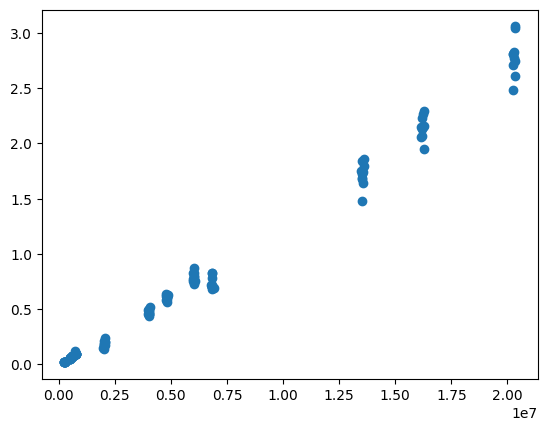

In [22]:
import matplotlib.pyplot as plt
#x = [n*m*(m+n) for (n, m, T) in stats]
x = [n*m for (n, m, T) in stats]
y = [T for (n, m, T) in stats]
# print(x)
# print(y)
plt.scatter(x, y)
plt.show()